### IMPORTING LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
train_df=pd.read_csv('Training.csv')
test_df=pd.read_csv('Testing.csv')

### PREPROCESSING DATA

In [ ]:
prognosis_labels=np.array(train_df['prognosis'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
train_df['prognosis']=encoder.fit_transform(train_df['prognosis'])
test_df['prognosis']=encoder.transform(test_df['prognosis'])

In [ ]:
label_train=train_df['prognosis']
label_test=test_df['prognosis']

In [ ]:
train_df.isna().sum()

itching                    0
skin_rash                  0
nodal_skin_eruptions       0
continuous_sneezing        0
shivering                  0
                        ... 
blister                    0
red_sore_around_nose       0
yellow_crust_ooze          0
prognosis                  0
Unnamed: 133            4920
Length: 134, dtype: int64

In [ ]:
train_df=train_df.drop(['Unnamed: 133','prognosis'],axis=1)
test_df=test_df.drop(['prognosis'],axis=1)

#### TESTING MODELS

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

from sklearn.svm import SVC
svc=SVC()

from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()


### COMPARING FOR DIFFERENT COMPONENTS IN PCA

In [ ]:
models = [log,knn,svc,nb]
model_name=['LogisticRegression','KNeighborsClassifier','SupportVectorClassifier','GaussianNaiveBayes']

1     0.2619047619047619
2     0.7380952380952381
3     0.8809523809523809
4     0.9285714285714286
1     0.9761904761904762
2     0.9761904761904762
3     0.9761904761904762
4     1.0
1     0.4523809523809524
2     0.9285714285714286
3     1.0
4     0.9523809523809523
1     0.47619047619047616
2     0.9285714285714286
3     1.0
4     1.0


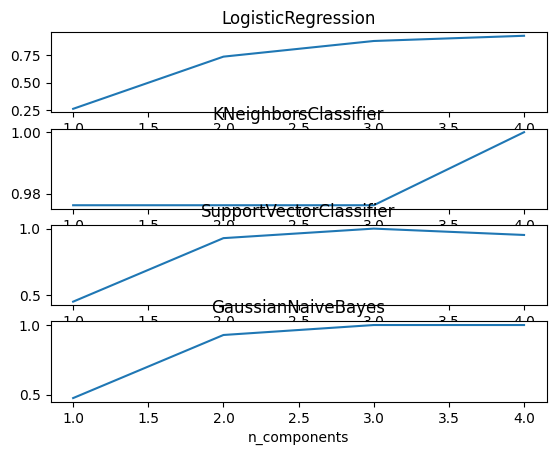

In [ ]:
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

figure, axis = plt.subplots(4, 1)

i=0

for model in models:

    components=[]
    accuracies=[]

    for n_comp in range(1,5):

        pca=PCA(n_components=n_comp)
        train_pca=pca.fit_transform(train_df)
        test_pca=pca.transform(test_df)

        model.fit(train_pca,label_train)
        y_preds=model.predict(test_pca)

        score=accuracy_score(y_true=label_test, y_pred=y_preds)
        components.append(n_comp)
        accuracies.append(score)
        print(n_comp,"   ", score)

    axis[i].plot(components,accuracies)
    axis[i].set_title(model_name[i])
    axis[i].set_xlabel('n_components')
    i+=1

plt.show()

### TUNING RANDOM FOREST HYPERPARAMETERS

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [ ]:
randf_model=RandomForestClassifier()
randf_pm=randf_model.get_params()
pm_grid = [
  {
  'criterion': ['gini','cross_entropy','log_loss'],
  'max_depth': [30,50,80,100,130],
  'max_leaf_nodes': [None,100,200,300,],
  'random_state': [0]
 }
  ]

In [ ]:

X_train, X_test, y_train, y_test=train_test_split(np.array(train_df),np.array(label_train),random_state=0)
clf = GridSearchCV(RandomForestClassifier(), param_grid=pm_grid)
clf.fit(np.array(train_df),np.array(label_train))
res=pd.DataFrame(clf.cv_results_)
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_leaf_nodes,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.200495,0.012287,0.013112,0.001522,gini,30,None,0,"{'criterion': 'gini', 'max_depth': 30, 'max_le...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
1,0.200117,0.006220,0.012769,0.001486,gini,30,100,0,"{'criterion': 'gini', 'max_depth': 30, 'max_le...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
2,0.198000,0.002647,0.011653,0.000769,gini,30,200,0,"{'criterion': 'gini', 'max_depth': 30, 'max_le...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
3,0.196695,0.000911,0.011592,0.000665,gini,30,300,0,"{'criterion': 'gini', 'max_depth': 30, 'max_le...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
4,0.197370,0.002587,0.012656,0.001599,gini,50,None,0,"{'criterion': 'gini', 'max_depth': 50, 'max_le...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
5,0.201716,0.001699,0.012320,0.000777,gini,50,100,0,"{'criterion': 'gini', 'max_depth': 50, 'max_le...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
6,0.202737,0.001638,0.012155,0.000829,gini,50,200,0,"{'criterion': 'gini', 'max_depth': 50, 'max_le...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
7,0.203457,0.001985,0.012085,0.000716,gini,50,300,0,"{'criterion': 'gini', 'max_depth': 50, 'max_le...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
8,0.199053,0.002674,0.012114,0.000961,gini,80,None,0,"{'criterion': 'gini', 'max_depth': 80, 'max_le...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
9,0.201284,0.001499,0.012359,0.000791,gini,80,100,0,"{'criterion': 'gini', 'max_depth': 80, 'max_le...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
